# Simulate the Monty Hall Problem

- Simulate three doors, one car, and two goats.
- Simulate three players: the switcher, the conservative, and the newcomer.
- Record who wins.
- Repeat it many times.
- Which player do you want to be?

**Food for thought**: And what if you had $N$ doors to choose from and the presenter opens $p \leq N$ of them? Study how the probability of winning changes as a function of $p$ and $N$.

In [23]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

In [ ]:
# Functions

# Single trial simulation
def trial(N, M):
    if M > N-2:
        raise ValueError("M must be less than or equal to N-2")
        
    # Simulate the doors from 1 to N
    doors = np.arange(N) + 1 
    # Choose a random door where put the car
    winning_door = rnd.choice(doors)

    # Initialize choices for the players
    switcher_initial = rnd.choice(doors)
    conservative = rnd.choice(doors)

    # The doors opens M distinct doors
    if switcher_initial == winning_door:
       possible_doors = [d for d in doors if d != winning_door]
    else:
        possible_doors = [d for d in doors if d not in [switcher_initial, winning_door]]
    
    open_doors = rnd.sample(possible_doors, M)

    # Remaining doors
    close_doors = [d for d in doors if d not in open_doors]

    # The switcher picks a new door among the remaining closed doors except his previous choice
    switcher = rnd.choice([d for d in close_doors if d != switcher_initial ])

    # The newcomer picks a door among the remaining one
    newcomer = rnd.choice(close_doors)

    # Winning condition
    switcher_win = (switcher == winning_door)
    conservative_win = (conservative == winning_door)
    newcomer_win = (newcomer == winning_door)

    return switcher_win, conservative_win, newcomer_win

def probability_simulation(N, M, trials):
    wins_switcher = 0
    wins_conservative = 0
    wins_newcomer = 0
    
    for _ in range(trials):
        sw, cons, new = trial(N, M)
        wins_switcher += int(sw)
        wins_conservative += int(cons)
        wins_newcomer += int(new)
    
    return wins_switcher / trials, wins_conservative / trials, wins_newcomer / trials

## Monty Hall Problem (N = 3)

Switcher wins: 66.7%
Conservative wins: 33.0%
Newcomer wins: 50.0%


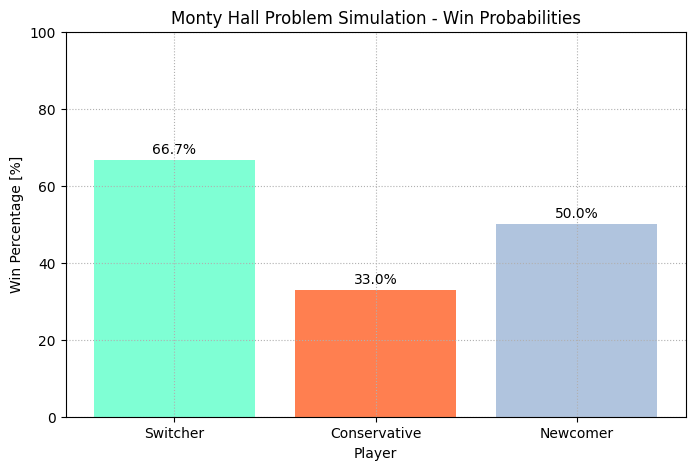

In [28]:
trials = 100000
N = 3
M = 1  # in the classical version the host open 1 door

# Probability simulation
switcher_win_prob, conservative_win_prob, newcomer_win_prob = probability_simulation(N, M, trials)

# Conversion of the win rates into percentage
win_percentages = [switcher_win_prob * 100, conservative_win_prob * 100, newcomer_win_prob * 100]

# Print the results
print(f"Switcher wins: {win_percentages[0]:.1f}%")
print(f"Conservative wins: {win_percentages[1]:.1f}%")
print(f"Newcomer wins: {win_percentages[2]:.1f}%")

# Plot the probability distribution
categories = ['Switcher', 'Conservative', 'Newcomer']

# Create a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, win_percentages, color=['aquamarine', 'coral', 'lightsteelblue'])

plt.xlabel("Player")
plt.ylabel("Win Percentage [%]")
plt.title("Monty Hall Problem Simulation - Win Probabilities")
plt.ylim(0, 100)

for bar, pct in zip(bars, win_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{pct:.1f}%", ha='center', va='bottom')

plt.grid(linestyle=':')
plt.show()

At the beginnig of the game the probability the car is behind your chisen door is 1/3. That means the probability the car is behind one of the other two doors is 2/3.

Afetr the host open one of the doors to reveal a goat (the host always avoids the car). 

Now, the door you pick before still has a 1/3 probability of hiding the car, but the total probability must sum to 1 and that means that the chance the car is behind the other unopened door is 2/3.

To resume the winnig probability are:
- 1/3 if you stay
- 2/3 if you switch

This shows that is always better switch the door.

For the newcomer, who walks in after one door has been opened and without knowing the original choice, the winnig probability is 1/2 or, in general 1/number_of_doors.

## Generalized Monty Hall Problem

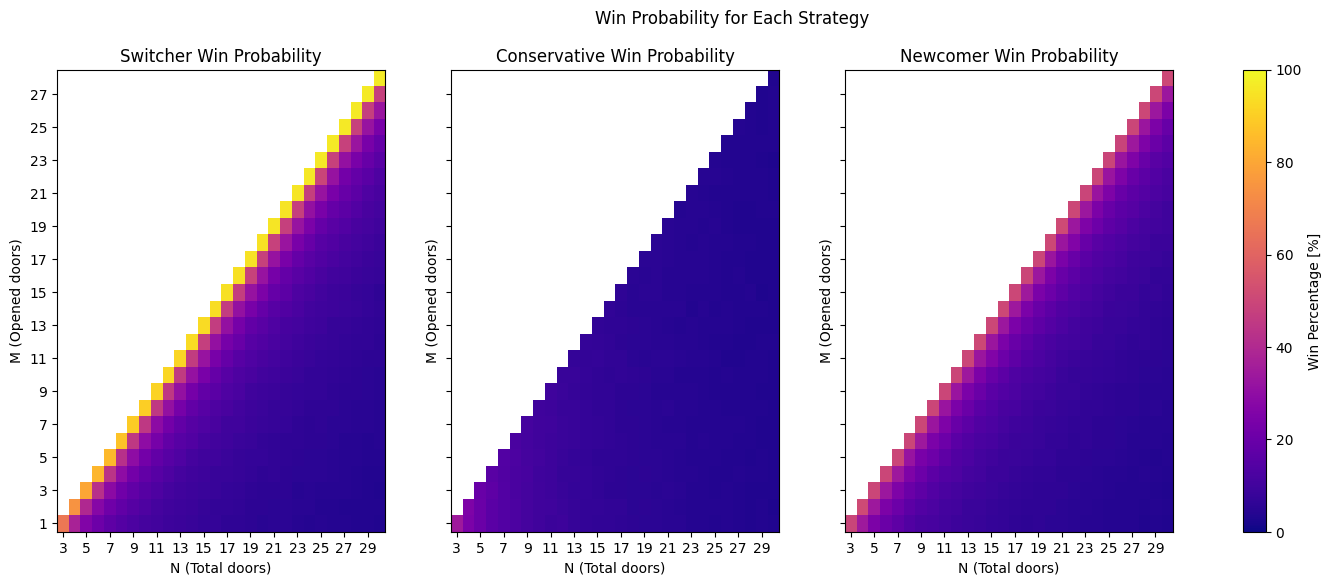

In [40]:
trials = 10000
N_max = 30

# Create a matrix for each strategy
switcher_prob_matrix = np.full((N_max - 2, N_max - 2), np.nan)
conservative_prob_matrix = np.full((N_max - 2, N_max - 2), np.nan)
newcomer_prob_matrix = np.full((N_max - 2, N_max - 2), np.nan)

# Fill the matrix with the winning probabilities
for N in range(3, N_max + 1):
    # for each value of N open M doors with M in [1, N - 2]
    for M in range(1, N - 1):
        switcher_prob, conservative_prob, newcomer_prob = probability_simulation(N, M, trials)
        switcher_prob_matrix[M - 1, N - 3] = switcher_prob * 100
        conservative_prob_matrix[M - 1, N - 3] = conservative_prob * 100
        newcomer_prob_matrix[M - 1, N - 3] = newcomer_prob * 100

# Plot the matrix
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

titles = ["Switcher", "Conservative", "Newcomer"]
matrices = [switcher_prob_matrix, conservative_prob_matrix, newcomer_prob_matrix]
vmin = 0
vmax = 100

for ax, data, title in zip(axs, matrices, titles):
    im = ax.imshow(data, origin='lower', aspect='auto', vmin=vmin, vmax=vmax, cmap='plasma')
    ax.set_title(f"{title} Win Probability")
    ax.set_xlabel("N (Total doors)")
    ax.set_xticks(np.arange(0, N_max - 2, 2))
    ax.set_xticklabels(np.arange(3, N_max + 1, 2))
    ax.set_yticks(np.arange(0, N_max - 2, 2))
    ax.set_yticklabels(np.arange(1, N_max - 1, 2))
    ax.set_ylabel("M (Opened doors)")

fig.colorbar(im, ax=axs, location='right', label='Win Percentage [%]')
plt.suptitle("Win Probability for Each Strategy")
plt.show()

In the generalized Monty Hall Prblem there are N doors and the host opens M of them. The win probability for the switcher player is:
$$P_{switch} = \frac{N - 1}{N} \cdot \frac{1}{N - M - 1}$$
where:
- $\frac{N - 1}{N}$ is the probability to choose a goat at the beginning of the game
- $\frac{1}{N - M - 1}$ is the probability of choosing the car from the remaninng unopened door, excluding the initially chosen

On the other hand, the winning probability for the conservative player is:
$$ P_{conservative} = \frac{1}{N}$$ 
which is always less than $P_{switch}$.

In the end, the newcomer has fewer door to choose, but doesn't have any previous information, so his win probability is:
$$P_{newcomer} = \frac{1}{N - M}$$
which is always better than the conservative probability, but worse than the switcher one.

Therefore, switching remains the better strategy no matter how many doors $N$ or opened doors $M$ are involved.